## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.99, 0.95, 0.90]

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOM = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mom-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 08:48:21.634129  9444 deprecation_wrapper.py:119] From C:\Users\yjlai\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 08:48:21.637129  9444 deprecation_wrapper.py:119] From C:\Users\yjlai\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 08:48:21.709129  9444 deprecation_wrapper.py:119] From C:\Users\yjlai\Anaconda3\envs\keras35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 08:48:21.821127  9444 deprecation.py:323] From C:\Users\yjlai\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.


Experiment with MOM = 0.990000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0084 - acc: 0.2876 - val_loss: 1.8473 - val_acc: 0.3571
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7929 - acc: 0.3736 - val_loss: 1.7588 - val_acc: 0.3856
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7124 - acc: 0.4012 - val_loss: 1.6841 - val_acc: 0.4169
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6533 - acc: 0.4201 - val_loss: 1.6377 - val_acc: 0.4276
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6065 - acc: 0.4386 - val_loss: 1.5988 - val_acc: 0.4387
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5694 - acc: 0.4507 - val_loss: 1.5649 - val_acc: 0.4496
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5343 - acc: 0.4630 - val_loss: 1.5443 - val_acc

50000/50000 [==============================] - 3s 54us/step - loss: 1.8788 - acc: 0.3395 - val_loss: 1.8402 - val_acc: 0.3488
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8035 - acc: 0.3693 - val_loss: 1.7790 - val_acc: 0.3789
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7523 - acc: 0.3880 - val_loss: 1.7287 - val_acc: 0.3974
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7106 - acc: 0.4018 - val_loss: 1.6951 - val_acc: 0.4023
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6765 - acc: 0.4152 - val_loss: 1.6654 - val_acc: 0.4163
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6460 - acc: 0.4241 - val_loss: 1.6467 - val_acc: 0.4235
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6208 - acc: 0.4338 - val_loss: 1.6111 - val_acc: 0.4302
Epoch 9/50
50000/50000 [============================

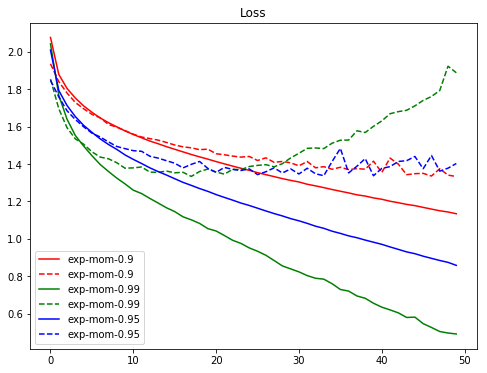

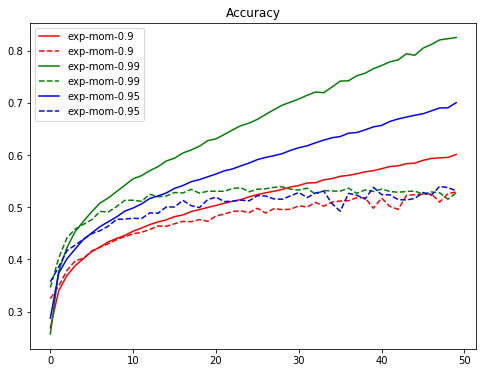

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()